# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [2]:
# Import essential libraries
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"PIL version: {PIL.__version__}")
print(f"tensorflow version: {tf.__version__}")
print(f"keras version: {keras.__version__}")
print(f"sklearn version: {sklearn.__version__}")

numpy version: 2.0.2
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib version: 3.10.0
PIL version: 11.3.0
tensorflow version: 2.19.0
keras version: 3.10.0
sklearn version: 1.6.1


Load the dataset.

In [4]:
# Load and unzip the dataset
os.mkdir('/data')
os.chdir('/data')
os.getcwd()
!wget https://woolfaws-prod.s3.ap-south-1.amazonaws.com/sharepoint_zips/Dataset_Waste_Segregation.zip -O /data/Dataset_Waste_Segregation.zip
!unzip /data/Dataset_Waste_Segregation.zip -d /data/
!unzip /data/Dataset_Waste_Segregation/Dataset_Waste_Segregation/data.zip -d /data/
!rm -rv /data/Dataset_Waste_Segregation
!rm -v /data/Dataset_Waste_Segregation.zip
!mv -v /data/data/* ./
!rm -rv data
!ls -lh

Streaming output truncated to the last 5000 lines.
  inflating: /data/data/Glass/file_420.png  
  inflating: /data/data/Glass/file_740.png  
  inflating: /data/data/Glass/file_458.png  
  inflating: /data/data/Glass/file_519.png  
  inflating: /data/data/Glass/file_162.png  
  inflating: /data/data/Glass/file_255.png  
  inflating: /data/data/Glass/file_47.png  
  inflating: /data/data/Glass/file_466.png  
  inflating: /data/data/Glass/file_593.png  
  inflating: /data/data/Glass/file_712.png  
  inflating: /data/data/Glass/file_611.png  
  inflating: /data/data/Glass/file_267.png  
  inflating: /data/data/Glass/file_296.png  
  inflating: /data/data/Glass/file_518.png  
  inflating: /data/data/Glass/file_555.png  
  inflating: /data/data/Glass/file_648.png  
  inflating: /data/data/Glass/file_70.png  
  inflating: /data/data/Glass/file_100.png  
  inflating: /data/data/Glass/file_32.png  
  inflating: /data/data/Glass/file_225.png  
  inflating: /data/data/Glass/file_111.png  
  infla

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [5]:
# Create a function to load the raw images
def load_image(image_path):
    img = Image.open(image_path).convert('RGB')
    return img

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [6]:
# Get the images and their labels
data_dir = '/data'
image_paths = []
labels = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):
                try:
                    img = load_image(image_path)  # Use the load_image function
                    image_paths.append(image_path)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

print(f"Number of images loaded: {len(image_paths)}")
print(f"Number of labels loaded: {len(labels)}")

Number of images loaded: 7625
Number of labels loaded: 7625


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

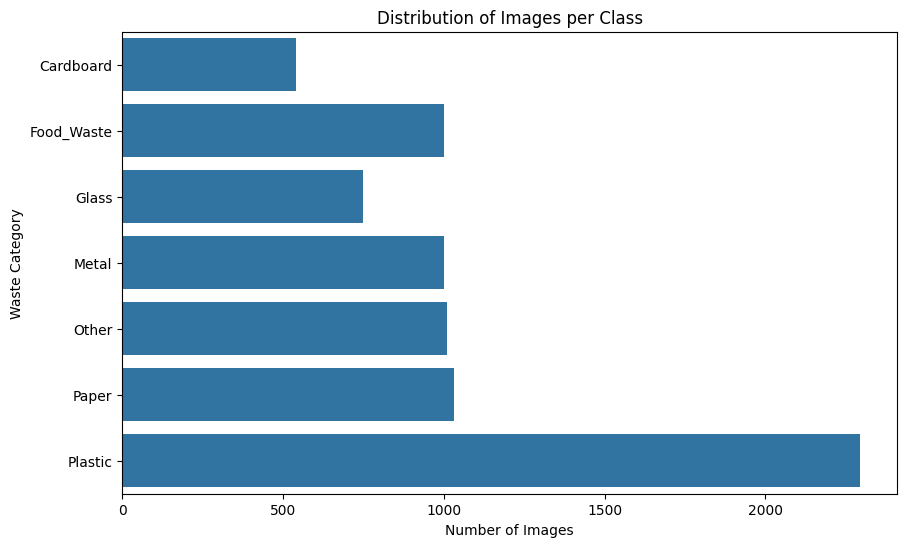

In [7]:
# Visualise Data Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=labels, order=sorted(list(set(labels))))
plt.title('Distribution of Images per Class')
plt.xlabel('Number of Images')
plt.ylabel('Waste Category')
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

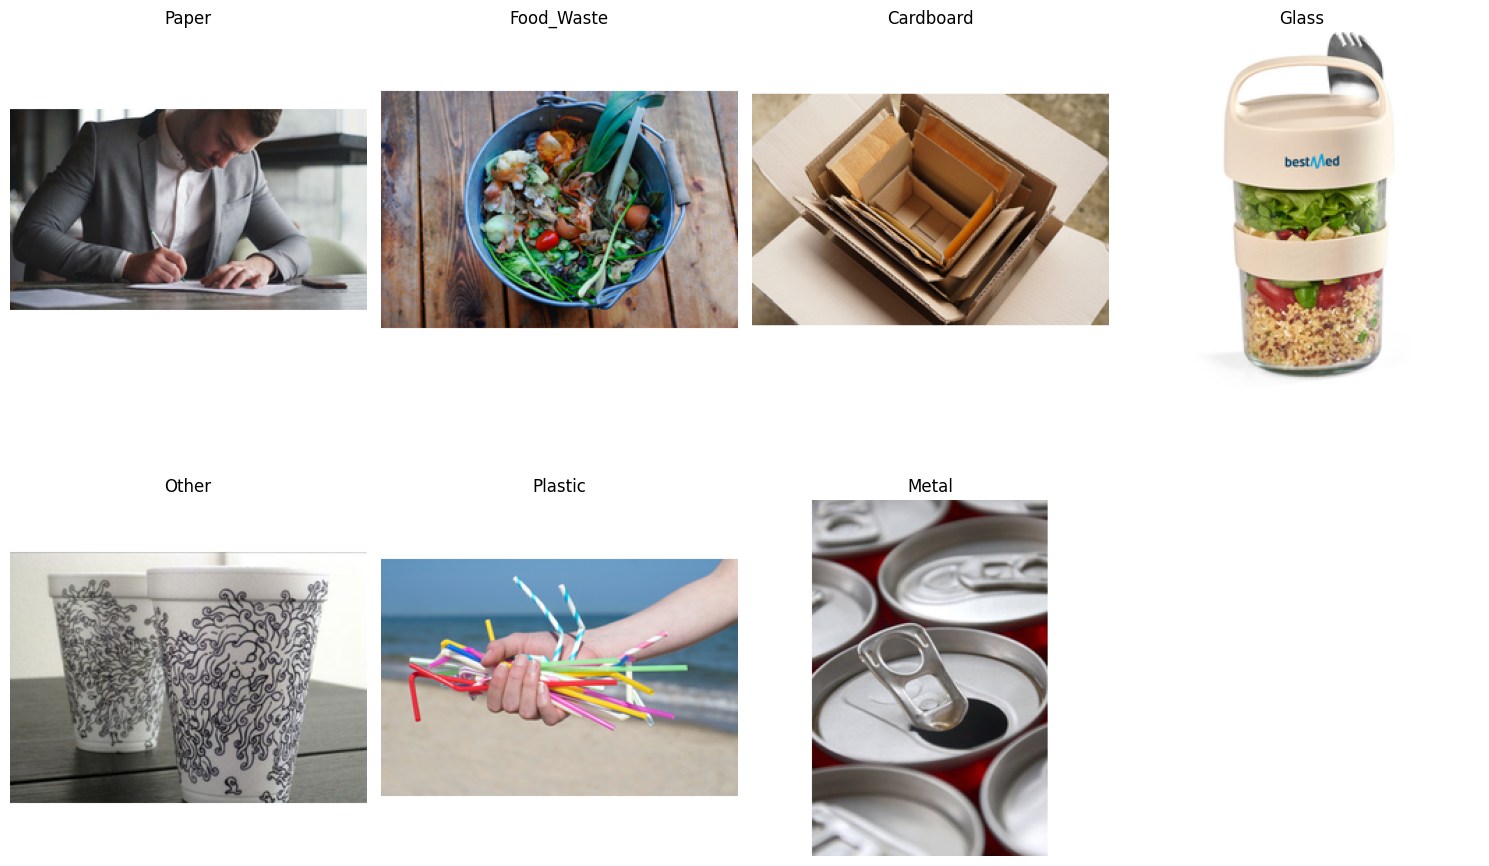

In [8]:
# Visualise Sample Images (across different labels)
unique_labels = list(set(labels))
plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels):
    # Find the index of the first image with this label
    index = labels.index(label)
    image_path = image_paths[index]
    img = load_image(image_path)

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [9]:
# Find the smallest and largest image dimensions from the data set
min_width = float('inf')
min_height = float('inf')
max_width = 0
max_height = 0

for image_path in image_paths:
    with Image.open(image_path) as img:
        width, height = img.size
        min_width = min(min_width, width)
        min_height = min(min_height, height)
        max_width = max(max_width, width)
        max_height = max(max_height, height)

print(f"Smallest dimensions: {min_width}x{min_height}")
print(f"Largest dimensions: {max_width}x{max_height}")

Smallest dimensions: 256x256
Largest dimensions: 256x256


In [10]:
# Resize the image dimensions
target_size = (224, 224) # Common size for CNN models

resized_images = []
for image_path in image_paths:
    img = load_image(image_path)
    img_resized = img.resize(target_size)
    resized_images.append(np.array(img_resized))

# Convert the list of arrays to a numpy array
resized_images = np.array(resized_images)

print(f"Shape of resized images array: {resized_images.shape}")

Shape of resized images array: (7625, 224, 224, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [11]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
integer_encoded_labels = label_encoder.fit_transform(labels)

# Use OneHotEncoder to convert integer labels to one-hot encoded vectors
# Reshape the array to be 2D as required by OneHotEncoder
integer_encoded_labels = integer_encoded_labels.reshape(len(integer_encoded_labels), 1)
onehot_encoder = OneHotEncoder(sparse_output=False) # Use sparse_output instead of sparse for newer versions
onehot_encoded_labels = onehot_encoder.fit_transform(integer_encoded_labels)

print(f"Original labels (first 5): {labels[:5]}")
print(f"Integer encoded labels (first 5): {integer_encoded_labels[:5].flatten()}")
print(f"One-hot encoded labels (first 5): {onehot_encoded_labels[:5]}")
print(f"Shape of one-hot encoded labels: {onehot_encoded_labels.shape}")

Original labels (first 5): ['Paper', 'Paper', 'Paper', 'Paper', 'Paper']
Integer encoded labels (first 5): [5 5 5 5 5]
One-hot encoded labels (first 5): [[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Shape of one-hot encoded labels: (7625, 7)


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    resized_images,
    onehot_encoded_labels,
    test_size=0.3,
    random_state=42, # for reproducibility
    stratify=onehot_encoded_labels # to maintain class distribution
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")


Shape of X_train: (5337, 224, 224, 3)
Shape of X_val: (2288, 224, 224, 3)
Shape of y_train: (5337, 7)
Shape of y_val: (2288, 7)


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [13]:
# Build and compile the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(unique_labels), activation='softmax') # Output layer with number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,759 (42.61 MB)

 Trainable params: 11,170,311 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50, # You can adjust the number of epochs
    batch_size=32, # You can adjust the batch size
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 30s 112ms/step - accuracy: 0.2524 - loss: 8.4482 - val_accuracy: 0.2823 - val_loss: 24.0672 - learning_rate: 0.0010
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.3096 - loss: 2.6965 - val_accuracy: 0.3234 - val_loss: 5.9121 - learning_rate: 0.0010
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.3403 - loss: 2.0412 - val_accuracy: 0.3177 - val_loss: 2.8143 - learning_rate: 0.0010
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.3219 - loss: 1.8942 - val_accuracy: 0.3099 - val_loss: 2.2773 - learning_rate: 0.0010
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.3290 - loss: 1.8425 - val_accuracy: 0.3313 - val_loss: 2.8387 - learning_rate: 0.0010
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.3317 - loss: 1.7486 - val_accuracy: 0.3427 - val_loss: 1.9113 - learning_rate: 0.0010
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.3465 -

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [ ]:
# Evaluate on the test set; display suitable metrics



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results